In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [3]:
import zipfile

zip_file = zipfile.ZipFile("archive (1) (1).zip", "r")
zip_file.extractall()

zip_file.namelist()

['README.txt', 'World_GDP_Population_CO2_Emissions_Dataset.csv']

In [4]:
import pandas as pd

df = pd.read_csv("World_GDP_Population_CO2_Emissions_Dataset.csv")

df.head()

,Year,GDP Real (USD),GDP growth (%),Per Capita,World Population,Net Change,Population change (%),Fossil CO2 Emissions (tons),CO2 emissions change,CO2 emissions per capita,Population Density (P/Km²)
0,2022,9.080000e+13,0.0324,11317,8021407192,66958801,0.0084,38521997860,0.0115,4.80,54
1,2021,8.790000e+13,0.0635,11054,7954448391,67447099,0.0086,38082163770,0.0595,4.79,53
2,2020,8.270000e+13,-0.0288,10483,7887001292,75707594,0.0097,35944470190,-0.0497,4.56,53
3,2019,8.510000e+13,0.0268,10898,7811293698,81390917,0.0105,37824905990,-0.0002,4.84,52
4,2018,8.290000e+13,0.0328,10726,7729902781,84284827,0.0110,37831867370,0.0255,4.89,52


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

df = df.drop_duplicates().dropna().reset_index(drop=True)

df.head()

,year,gdp_real_usd_,gdp_growth_%,per_capita,world_population,net_change,population_change_%,fossil_co2_emissions_tons,co2_emissions_change,co2_emissions_per_capita,population_density_p/km²
0,2022,9.080000e+13,0.0324,11317,8021407192,66958801,0.0084,38521997860,0.0115,4.80,54
1,2021,8.790000e+13,0.0635,11054,7954448391,67447099,0.0086,38082163770,0.0595,4.79,53
2,2020,8.270000e+13,-0.0288,10483,7887001292,75707594,0.0097,35944470190,-0.0497,4.56,53
3,2019,8.510000e+13,0.0268,10898,7811293698,81390917,0.0105,37824905990,-0.0002,4.84,52
4,2018,8.290000e+13,0.0328,10726,7729902781,84284827,0.0110,37831867370,0.0255,4.89,52


In [6]:
df = df.rename(columns={
    "gdp_real_usd": "gdp",
    "world_population": "population",
    "fossil_co2_emissions_tons": "co2_emissions",
    "co2_emissions_per_capita": "co2_per_capita"
})

In [8]:
df.columns.tolist()

['year',
 'gdp_real_usd_',
 'gdp_growth_%',
 'per_capita',
 'population',
 'net_change',
 'population_change_%',
 'co2_emissions',
 'co2_emissions_change',
 'co2_per_capita',
 'population_density_p/km²']

In [9]:
df = df.rename(columns={
    "gdp_real_usd_": "gdp"
})

In [10]:
df.columns.tolist()

['year',
 'gdp',
 'gdp_growth_%',
 'per_capita',
 'population',
 'net_change',
 'population_change_%',
 'co2_emissions',
 'co2_emissions_change',
 'co2_per_capita',
 'population_density_p/km²']

In [11]:
df["carbon_intensity"] = df["co2_emissions"] / df["gdp"]

In [12]:
df.columns = df.columns.str.rstrip("_")

In [13]:
# ensure clean columns
df.columns = df.columns.str.rstrip("_")

# rename properly
df = df.rename(columns={
    "gdp_real_usd": "gdp"
})

# create ESG metric
df["carbon_intensity"] = df["co2_emissions"] / df["gdp"]

df.head()

,year,gdp,gdp_growth_%,per_capita,population,net_change,population_change_%,co2_emissions,co2_emissions_change,co2_per_capita,population_density_p/km²,carbon_intensity
0,2022,9.080000e+13,0.0324,11317,8021407192,66958801,0.0084,38521997860,0.0115,4.80,54,0.000424
1,2021,8.790000e+13,0.0635,11054,7954448391,67447099,0.0086,38082163770,0.0595,4.79,53,0.000433
2,2020,8.270000e+13,-0.0288,10483,7887001292,75707594,0.0097,35944470190,-0.0497,4.56,53,0.000435
3,2019,8.510000e+13,0.0268,10898,7811293698,81390917,0.0105,37824905990,-0.0002,4.84,52,0.000444
4,2018,8.290000e+13,0.0328,10726,7729902781,84284827,0.0110,37831867370,0.0255,4.89,52,0.000456


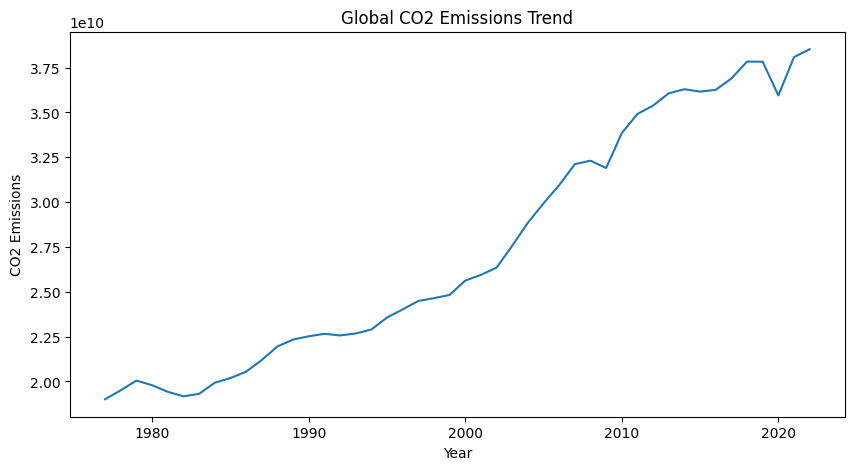

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["year"], df["co2_emissions"])
plt.title("Global CO2 Emissions Trend")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.show()

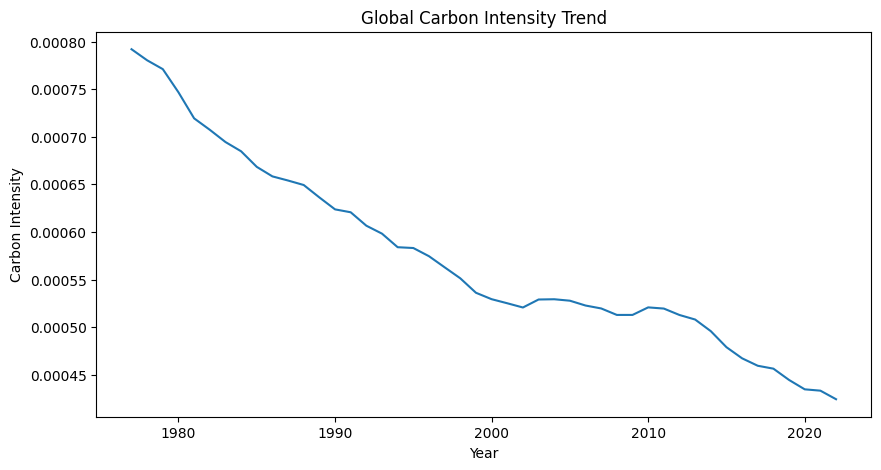

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["carbon_intensity"])
plt.title("Global Carbon Intensity Trend")
plt.xlabel("Year")
plt.ylabel("Carbon Intensity")
plt.show()

In [16]:
df.to_csv("global_esg_cleaned.csv", index=False)

from google.colab import files
files.download("global_esg_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>